### **Обучение нейронной сети, и анализ производительности предложенной модели**
***Created by Khalil Yahia***


# Configuration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dropout



## **Google drive connect**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Create Dataset function

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset_2(dataset):
	dataX = []
	data_res=[]
	index_counter=0
	for i in range(int(len(dataset)/3)):
		index_counter=index_counter+1
		a =np.array([dataset[i*3, 0:64],dataset[i*3+1, 0:64]])
		dataX.append(a.reshape((128)))
		if(index_counter==10):
			index_counter=0
			data_res.append(np.array(dataX).reshape(128*10))
			dataX = []
	return np.array(data_res)

def create_dataset(dataset):
	dataX = []
	for i in range(int(len(dataset)/3)):
		a =np.array([dataset[i*3, 0:64],dataset[i*3+1, 0:64]])
		dataX.append(a.reshape((128)))
	return np.array(dataX)

# Load dataset

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe_result = read_csv('drive/MyDrive/DataColab_matlab/result_1_3000_with_Power_1000_goodresult.csv', engine='python')
#dataframe_result = read_csv('drive/MyDrive/DataColab_matlab/result_1_3000.csv', engine='python')#
dataset_result = dataframe_result.values
dataset_result = dataset_result.astype('float32')
# normalize the dataset
#scaler = MinMaxScaler(feature_range=(0, 1))
#dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = 89700
test_size = 300
#train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train_result, test_result = dataset_result[0:train_size,1:65], dataset_result[train_size:len(dataset_result),1:65]

# تحميل قاعدة بيانات الدخل
# load the dataset
dataframe_input = read_csv('drive/MyDrive/DataColab_matlab/channelLMS_NTN_19_4_32_2.csv', engine='python')
dataset_input = dataframe_input.values
dataset_input = dataset_input.astype('float32')

train_input, test_input = dataset_input[0:train_size,0:64], dataset_input[train_size:len(dataset_result),0:64]

trainX = create_dataset(train_input)
trainY = create_dataset(train_result)

testX = create_dataset(test_input)
testY = create_dataset(test_result)
#testX, testY = create_dataset(test)

In [ ]:
print(testX)
print(len(train_input))

[[-0.26057416  0.15214321  0.14074397 ...  0.6906508   0.4896317
   0.7513992 ]
 [-0.09717221  0.20104119 -0.20025054 ... -0.5420491  -0.7060255
  -0.6930496 ]
 [-0.00418332  0.01679789  0.03232266 ...  0.42591393  0.6055448
   0.94604176]
 ...
 [-0.09511151  0.06425191 -0.10724083 ...  0.5525339   0.47325283
   0.58041936]
 [ 0.7664459   0.7034817   0.6090216  ... -0.31342304 -0.12427797
  -0.12746052]
 [ 0.6088549   0.57792485  0.56663656 ...  0.4134826   0.3599902
   0.44466814]]
89700


# Model

In [ ]:
# create and fit the LSTM network
#model = Sequential()
input_  = Input(shape=trainX.shape[1:], name="Input_a")
hidden1 = tf.keras.layers.Dense(256, activation="sigmoid")(input_)
hidden2 = tf.keras.layers.Dense(256, activation="sigmoid")(hidden1)


idden1_2 = tf.keras.layers.Dense(128)(input_)
#hidden2_2 = tf.keras.layers.Dense(256)(hidden1_2)

#hidden1_3 = tf.keras.layers.Dense(128, activation="relu")(input_)
#hidden2_3 = tf.keras.layers.Dense(128, activation="relu")(hidden1_3)

concat = tf.keras.layers.Concatenate()([hidden2, idden1_2])
output = tf.keras.layers.Dense(128)(concat)
model = tf.keras.Model(inputs=[input_], outputs=[output])


#model.add(Dense(2096,activation='tanh'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#history=model.fit(trainX, trainY, epochs=100, batch_size=10,validation_split=0.2, verbose=1)#######################
#history=model.fit(trainX, trainY, epochs=100, batch_size=10)#######################
history = model.fit(trainX, trainY, epochs=50,batch_size=10,
validation_data=(testX, testY))

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


print(model.summary())

Epoch 1/50
2990/2990 [==============================] - 12s 4ms/step - loss: 0.0040 - accuracy: 0.9045 - val_loss: 7.9882e-05 - val_accuracy: 0.9600
Epoch 2/50
2990/2990 [==============================] - 8s 3ms/step - loss: 1.0155e-04 - accuracy: 0.9568 - val_loss: 3.9085e-04 - val_accuracy: 0.8500
Epoch 3/50
2990/2990 [==============================] - 9s 3ms/step - loss: 1.1029e-04 - accuracy: 0.9524 - val_loss: 4.2395e-05 - val_accuracy: 0.9300
Epoch 4/50
2990/2990 [==============================] - 9s 3ms/step - loss: 9.2884e-05 - accuracy: 0.9589 - val_loss: 2.1856e-04 - val_accuracy: 0.8800
Epoch 5/50
2990/2990 [==============================] - 8s 3ms/step - loss: 1.0504e-04 - accuracy: 0.9507 - val_loss: 7.4180e-05 - val_accuracy: 0.9400
Epoch 6/50
2990/2990 [==============================] - 9s 3ms/step - loss: 9.8139e-05 - accuracy: 0.9563 - val_loss: 4.1148e-05 - val_accuracy: 0.9600
Epoch 7/50
2990/2990 [==============================] - 9s 3ms/step - loss: 8.3390e-05 - ac

In [ ]:
#print(trainX[0])

#test_x_3=np.array([[-0.291592303,	-0.519578301,	-0.629507101,	-0.628428751,	-0.585626067,	-0.543490558,	-0.55544675	,-0.444711533,	-0.608344892,	-0.317779556	,-0.398699352	,-0.388387372	,-0.335911269,	-0.602450482	,-0.341930713,	-0.435387553,	-0.440306389,	-0.491554977,	-0.493555735,	-0.515836336,	-0.392657271,	-0.382325671,	-0.506716778,	-0.514921889,	-0.393818704,	-0.248685441	,-0.524853007	,-0.306583996	,-0.548184608	,-0.592780441	,-0.473557611,	-0.381386109,	-0.5818578,	-0.228419241,	-0.339411804,	-0.14221444	,-0.321152929	,-0.268766174,	-0.434724166,	-0.285592102	,-0.375492684,	-0.144518344	,-0.609738116	,-0.440118003,	-0.335475986,	-0.600482117,	-0.46433354,	-0.485514957,	-0.478538269	,-0.312176132	,-0.278827299,	-0.599876893,	-0.206979276,	-0.680814793,	-0.535893436	,-0.410583308,	-0.432438774,	-0.438931334,	-0.119239768	,-0.162770368,	-0.475533231,	-0.533831322,	-0.543907712,-0.325279088,-0.566456223,	-0.475101463	,-0.381325289,	-0.401622703,	-0.432318977,	-0.757441319,	-0.419164508,	-0.457124593,	-0.440088449,	-0.213812164,	-0.470307402,	-0.482210793,	-0.435067877,	-0.639124841,	-0.498912854	,-0.412098745	,-0.488692571,	-0.514840392,	-0.43391385	,-0.529444654	,-0.577559255,	-0.296605869,	-0.484254208,	-0.767747463,	-0.71968595	,-0.528979784	,-0.648933988	,-0.446159827	,-0.455733803	,-0.489433992,	-0.416166917,	-0.54930625,	-0.397645297,	-0.428273838,	-0.496033214,	-0.458428597,	-0.301598338	,-0.506340712,	-0.202129883,	-0.210329641,	-0.463887489,	-0.361958944,	-0.542061132	,-0.652780446,	-0.385735585	,-0.373865838,	-0.298785396	,-0.733344251,	-0.229716783,	-0.618603263,	-0.334500033,	-0.520223948,	-0.577412501,	-0.301733249,	-0.405772628,	-0.468469643,	-0.377699012,	-0.510371065,	-0.404010308	,-0.482488624,	-0.343507718,	-0.487955351	,-0.266319935	,-0.513926458]])
#print(test_x_3)
#print(model.predict(test_x_3[0:1,:]))
#print(testY[9,:])
#model.predict(test_x_3[0:1,:])
print(trainY[0]-trainPredict[0])
print(testY[1]-testPredict[1])

In [ ]:
print(testX)

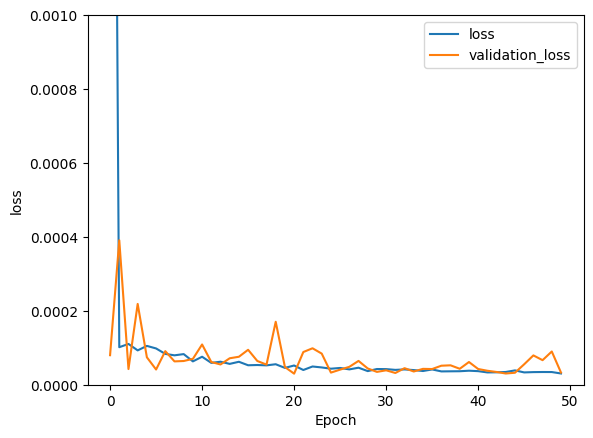

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.001])
plt.legend(loc='upper right')

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model.save('drive/MyDrive/DataColab_matlab/model1')

In [ ]:
end_model_1 = tf.keras.models.load_model('drive/MyDrive/DataColab_matlab/model1')
end_model_2 = tf.keras.models.load_model('drive/MyDrive/DataColab_matlab/model2')

In [ ]:

print(end_model_1.summary())
print(end_model_2.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 512)               66048     
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dense_20 (Dense)            (None, 128)               65664     
                                                                 
Total params: 410,880
Trainable params: 410,880
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)         

### **Model_Power1000**

In [ ]:
# create and fit the LSTM network
#model = Sequential()
input_1000  = Input(shape=trainX.shape[1:], name="Input_a")
hidden1_1000 = tf.keras.layers.Dense(256, activation="sigmoid")(input_1000)
hidden2_1000 = tf.keras.layers.Dense(256, activation="sigmoid")(hidden1_1000)


idden1_2_1000 = tf.keras.layers.Dense(128)(input_1000)
#hidden2_2 = tf.keras.layers.Dense(256)(hidden1_2)

#hidden1_3 = tf.keras.layers.Dense(128, activation="relu")(input_)
#hidden2_3 = tf.keras.layers.Dense(128, activation="relu")(hidden1_3)

concat_1000 = tf.keras.layers.Concatenate()([hidden2_1000, idden1_2_1000])
output_1000 = tf.keras.layers.Dense(128)(concat_1000)
Model_Power1000 = tf.keras.Model(inputs=[input_1000], outputs=[output_1000])


#model.add(Dense(2096,activation='tanh'))

Model_Power1000.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#history=model.fit(trainX, trainY, epochs=100, batch_size=10,validation_split=0.2, verbose=1)#######################
#history=model.fit(trainX, trainY, epochs=100, batch_size=10)#######################
history = Model_Power1000.fit(trainX, trainY, epochs=100,batch_size=64,
validation_data=(testX, testY))

# make predictions
trainPredict = Model_Power1000.predict(trainX)
testPredict = Model_Power1000.predict(testX)

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


print(model.summary())

Epoch 1/100
468/468 [==============================] - 5s 4ms/step - loss: 0.1822 - accuracy: 0.6785 - val_loss: 1.9415e-04 - val_accuracy: 0.9700
Epoch 2/100
468/468 [==============================] - 1s 3ms/step - loss: 6.9951e-05 - accuracy: 0.9862 - val_loss: 2.0750e-04 - val_accuracy: 0.9500
Epoch 3/100
468/468 [==============================] - 2s 3ms/step - loss: 7.3124e-05 - accuracy: 0.9856 - val_loss: 2.0314e-04 - val_accuracy: 0.9800
Epoch 4/100
468/468 [==============================] - 2s 3ms/step - loss: 7.7196e-05 - accuracy: 0.9849 - val_loss: 2.1343e-04 - val_accuracy: 0.9800
Epoch 5/100
468/468 [==============================] - 2s 3ms/step - loss: 8.2925e-05 - accuracy: 0.9851 - val_loss: 2.1565e-04 - val_accuracy: 0.9600
Epoch 6/100
468/468 [==============================] - 2s 4ms/step - loss: 1.0608e-04 - accuracy: 0.9833 - val_loss: 3.1973e-04 - val_accuracy: 0.9500
Epoch 7/100
468/468 [==============================] - 2s 5ms/step - loss: 1.4019e-04 - accuracy: 

## **Расчет эффективности использования спектра**

In [ ]:
# Khalil code
sigma = 1
d=2
def calculate_sumRate(H,V,K,d):
  m_notEqual_k=0
  sum_rate_kh=0
  for k in range(K):
    I_mat_kh=np.eye(d) + 0j*np.eye(d) # -(U[k].conjugate().T).dot(H[k]).dot(V[k])
    m_notEqual_k=0
    for m in range(K):
      if(m!=k):
        #print(m)
        m_notEqual_k = m_notEqual_k + np.dot(H[k],np.dot(V[m],np.dot(V[m].conjugate().T,H[k].conjugate().T)))
    m_notEqual_k = m_notEqual_k + sigma**2 *I_mat_kh
    m_notEqual_k = np.linalg.inv(m_notEqual_k)
    temp_help = np.dot(H[k],np.dot(V[k],np.dot(V[k].conjugate().T,np.dot(H[k].conjugate().T,m_notEqual_k))))
    #temp_help = np.dot(temp_help,m_notEqual_k)
    temp_help = I_mat_kh + temp_help
    sum_rate_kh = sum_rate_kh + np.log(np.linalg.det(temp_help))

  return sum_rate_kh

In [ ]:
print(testX)

[[-0.26057416  0.15214321  0.14074397 ...  0.6906508   0.4896317
   0.7513992 ]
 [-0.09717221  0.20104119 -0.20025054 ... -0.5420491  -0.7060255
  -0.6930496 ]
 [-0.00418332  0.01679789  0.03232266 ...  0.42591393  0.6055448
   0.94604176]
 ...
 [-0.09511151  0.06425191 -0.10724083 ...  0.5525339   0.47325283
   0.58041936]
 [ 0.7664459   0.7034817   0.6090216  ... -0.31342304 -0.12427797
  -0.12746052]
 [ 0.6088549   0.57792485  0.56663656 ...  0.4134826   0.3599902
   0.44466814]]


1/1 [==============================] - 0s 43ms/step
1000
(62.10241011065587-8.936265356168647e-16j)
2000
(73.03793767921684-3.1420178958629933e-16j)
3000
(78.79965146147858-1.1771454037218247e-15j)
4000
(82.51184796138176+3.190698573407591e-15j)
5000
(85.14981912724423-1.0048927835681894e-15j)
6000
(87.13956763343506+5.865696383472452e-15j)
7000
(88.70260367612504+3.3568525563409946e-15j)
8000
(89.96744761654878-1.5903077466017381e-15j)
9000
(91.01456621100975+1.0587234214320943e-15j)
10000
(91.89725920688856+6.483528991463307e-17j)
(-0.4340653121471405+0.4803619086742401j)
-----------------------
(-0.534065306186676+0.3803619146347046j)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:898: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))


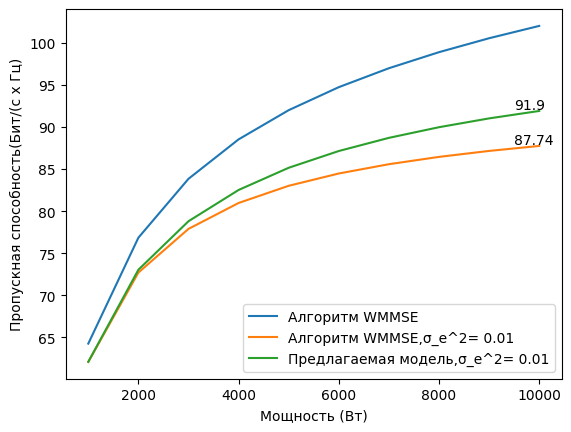

In [ ]:

channel_h=testX
Nr=2
Nt=32
K=10
#PT_array=np.array([10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])
PT_array=np.array([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
ch_com = []
ch_com_2_withError = []
def Plot_rate_By_model(Model_):
  temp_H = np.zeros((2,Nt))+1j*np.zeros((2,Nt))
  temp_H_holderError = np.zeros((2,Nt))+1j*np.zeros((2,Nt))
  data = np.zeros((Nr,Nt))+1j*np.zeros((Nr,Nt))
  data_holderError= np.zeros((Nr,Nt))+1j*np.zeros((Nr,Nt))
  H = np.zeros((K,Nr,Nt))+1j*np.zeros((K,Nr,Nt))
  H_holderError = np.zeros((K,Nr,Nt))+1j*np.zeros((K,Nr,Nt))

  ch_error_holder = np.zeros((1,128))

  temp_V = np.zeros((Nt,2))+1j*np.zeros((Nt,2))
  data_V = np.zeros((Nt,Nr))+1j*np.zeros((Nt,Nr))
  V_predected = np.zeros((K,Nt,Nr))+1j*np.zeros((K,Nt,Nr))
  index_channel_test=20
  for i in range(K):
    xx=0.1#np.random.normal(0, 0.001, size=(1, 1,128))
    channel_h[index_channel_test:index_channel_test+1,:]= channel_h[index_channel_test:index_channel_test+1,:]+ xx
    ch_error_holder=channel_h[index_channel_test:index_channel_test+1,:]+0


    predected_V_i_model1= Model_.predict(channel_h[index_channel_test:index_channel_test+1,:])
    channel_h[index_channel_test:index_channel_test+1,:]=channel_h[index_channel_test:index_channel_test+1,:] - xx
    #print(channel_h[index_channel_test:index_channel_test+1,:])
    #print('++++++++++++++++++++++++++++++++++++++++')
    #print(ch_error_holder)

    for v2 in range(Nt):
      temp_H[0,v2]=complex(channel_h[index_channel_test,v2],channel_h[index_channel_test,v2+32])
      temp_H[1,v2]=complex(channel_h[index_channel_test,v2+64],channel_h[index_channel_test,v2+96])

      temp_H_holderError[0,v2]=complex(ch_error_holder[0,v2],ch_error_holder[0,v2+32])
      temp_H_holderError[1,v2]=complex(ch_error_holder[0,v2+64],ch_error_holder[0,v2+96])

      #print(predected_V_i_model1)
      temp_V[v2,0]=complex(predected_V_i_model1[0,v2],predected_V_i_model1[0,v2+32])
      temp_V[v2,1]=complex(predected_V_i_model1[0,v2+64],predected_V_i_model1[0,v2+96])

    data[0,:] = temp_H[0,:].reshape(1,Nt)
    data[1,:] = temp_H[1,:].reshape(1,Nt)
    data_holderError[0,:] = temp_H_holderError[0,:].reshape(1,Nt)
    data_holderError[1,:] = temp_H_holderError[1,:].reshape(1,Nt)
    H[i,:,:] = data;
    ch_com.append(H)

    H_holderError[i,:,:] = data_holderError;

    ch_com_2_withError.append(H_holderError)
    data_V[:,0] = temp_V[:,0]
    data_V[:,1] = temp_V[:,1]
    V_predected[i,:,:] = data_V;

    index_channel_test=index_channel_test+1
    #print(H[i,:,:])

  sum_rate = []
  #Scale V
  for i in range(len(PT_array)):
    PT=PT_array[i]
    print(PT)
    alpha = np.sqrt(PT/np.sum([np.trace(np.dot(V_predected[i],V_predected[i].conjugate().T)) for i in range(K)]))
    for k in range(K):  #Scale V_k
      V_predected[k] = alpha * V_predected[k]
    res_= calculate_sumRate(H,V_predected,K,d)
    sum_rate.append(res_)
    print(res_)

  return sum_rate

def Plot_rate_By_bothmodels():
  temp_H = np.zeros((2,Nt))+1j*np.zeros((2,Nt))
  data = np.zeros((Nr,Nt))+1j*np.zeros((Nr,Nt))
  H = np.zeros((K,Nr,Nt))+1j*np.zeros((K,Nr,Nt))

  temp_V = np.zeros((Nt,2))+1j*np.zeros((Nt,2))
  data_V = np.zeros((Nt,Nr))+1j*np.zeros((Nt,Nr))
  V_predected = np.zeros((K,Nt,Nr))+1j*np.zeros((K,Nt,Nr))
  index_channel_test=1
  for i in range(K):
    predected_V_i_model1_= model.predict(channel_h[index_channel_test:index_channel_test+1,:])
    #predected_V_i_model2_= end_model_2.predict(channel_h[index_channel_test:index_channel_test+1,:])
    #predected_V_i_model1 = (predected_V_i_model1_ + predected_V_i_model2_)/2
    for v2 in range(Nt):
      temp_H[0,v2]=complex(channel_h[index_channel_test,v2],channel_h[index_channel_test,v2+32])
      temp_H[1,v2]=complex(channel_h[index_channel_test,v2+64],channel_h[index_channel_test,v2+96])
      #print(predected_V_i_model1)
      temp_V[v2,0]=complex(predected_V_i_model1_[0,v2],predected_V_i_model1_[0,v2+32])
      temp_V[v2,1]=complex(predected_V_i_model1_[0,v2+64],predected_V_i_model1_[0,v2+96])

    data[0,:] = temp_H[0,:].reshape(1,Nt)
    data[1,:] = temp_H[1,:].reshape(1,Nt)
    H[i,:,:] = data;

    data_V[:,0] = temp_V[:,0]
    data_V[:,1] = temp_V[:,1]
    V_predected[i,:,:] = data_V;

    index_channel_test=index_channel_test+1
    #print(H[i,:,:])

  sum_rate = []
  #Scale V
  for i in range(len(PT_array)):
    PT=PT_array[i]
    print(PT)
    alpha = np.sqrt(PT/np.sum([np.trace(np.dot(V_predected[i],V_predected[i].conjugate().T)) for i in range(K)]))
    for k in range(K):  #Scale V_k
      V_predected[k] = alpha * V_predected[k]
    res_= calculate_sumRate(H,V_predected,K,d)
    sum_rate.append(res_)
    print(res_)
  return sum_rate


plot_model1 = Plot_rate_By_model(Model_Power1000)
print(ch_com_2_withError[0][0,0,0])
print('-----------------------')
print(ch_com[0][0,0,0])
plot_WMMSE,plot_WMMSE_Error = calculate_sumRate_by_WMMSE(PT_array,ch_com,ch_com_2_withError)
plt.hold=True
plt.plot(PT_array,plot_WMMSE)
plt.plot(PT_array,plot_WMMSE_Error)
plt.plot(PT_array,plot_model1)



#plt.plot(PT_array,Plot_rate_By_bothmodels())

plt.xlabel("Мощность (Вт)")
plt.ylabel("Пропускная способность(Бит/(с x Гц)")
plt.legend(['Алгоритм WMMSE','Алгоритм WMMSE,σ_e^2= 0.01','Предлагаемая модель,σ_e^2= 0.01'])
plt.text(9500, plot_WMMSE_Error[9]+0.2, str(round(np.real(plot_WMMSE_Error[9]),2)))
plt.text(9500, plot_model1[9]+0.2, str(round(np.real(plot_model1[9]),2)))
plt.show()



## **Plot by WMMSE algo**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
def calculate_sumRate_by_WMMSE(PT_array_,ch_H,ch_H_2_withError):
  sum_rate_returned=[]
  sum_rate_returned_Error=[]
  # Update of Uk, Wk, Vk
  def update_Uk(A, U, V, H, K, Nr):
      for k in range(K):
          A_item = np.zeros((Nr,Nr),complex)
          for m in range(K):
              A_item += H[k].dot(V[m]).dot(V[m].conjugate().T).dot(H[k].conjugate().T)

          A[k] = sigma**2/PT*np.sum([np.trace(np.dot(V[i],V[i].conjugate().T)) for i in range(K)])*np.eye(Nr) + A_item
          U[k] = np.linalg.inv(A[k]).dot(H[k]).dot(V[k])
      return U

  def update_Wk(U, V, W_old, W, K, d):
      for k in range(K):
          E = np.eye(d) + 0j*np.eye(d) -(U[k].conjugate().T).dot(H[k]).dot(V[k])
          W_old[k] = W[k]
          W[k] = np.linalg.inv(E)
      return W, W_old

  def update_Vk(V, W, U, H, K, Nt, sigma):
      for k in range(K):
          B_item = np.zeros((Nt,Nt),complex)
          for m in range(K):
              B_item += (H[m].conjugate().T).dot(U[m]).dot(W[m]).dot(U[m].conjugate().T).dot(H[m])
          B = B_item + sigma**2/PT*np.sum([np.trace(U[i].dot(W[i]).dot(U[i].conjugate().T)) for i in range(K)])*np.eye(Nt)
          V[k] = np.linalg.inv(B).dot(H[k].conjugate().T).dot(U[k]).dot(W[k])
      #Scale
      alpha = np.sqrt(PT/np.sum([np.trace(np.dot(V[i],V[i].conjugate().T)) for i in range(K)]))
      for k in range(K):
          V[k] = alpha * V[k]
      return V

  # Khalil code
  def calculate_sumRate(H,V,K,d):
    m_notEqual_k=0
    sum_rate_kh=0
    for k in range(K):
      I_mat_kh=np.eye(d) + 0j*np.eye(d) # -(U[k].conjugate().T).dot(H[k]).dot(V[k])
      m_notEqual_k=0
      for m in range(K):
        if(m!=k):
          #print(m)
          m_notEqual_k = m_notEqual_k + np.dot(H[k],np.dot(V[m],np.dot(V[m].conjugate().T,H[k].conjugate().T)))
      m_notEqual_k = m_notEqual_k + sigma**2 *I_mat_kh
      m_notEqual_k = np.linalg.inv(m_notEqual_k)
      temp_help = np.dot(H[k],np.dot(V[k],np.dot(V[k].conjugate().T,np.dot(H[k].conjugate().T,m_notEqual_k))))
      #temp_help = np.dot(temp_help,m_notEqual_k)
      temp_help = I_mat_kh + temp_help
      sum_rate_kh = sum_rate_kh + np.log(np.linalg.det(temp_help))

    return sum_rate_kh



  PT_array=PT_array_
  index_in_excel=0
  for pt_index in range(len(PT_array)):
    K = 10

    PT = PT_array[pt_index]
    sigma = 1
    epsilon = 1e-5
    d = 2
    Nr = 2
    Nt = 32
    Imax = 100  #The maximum number of iterations
    err = float("inf")
    alpha=1
    dataset_shift=0

    rate=[]
    rate_Error=[]

    channel_index=0
    temp_H = np.zeros((2,Nt))+1j*np.zeros((2,Nt))

    for num_test in range(2):
        #initial H
        mean1 = np.zeros(Nr)
        cov1 = np.eye(Nr)
        data = np.zeros((Nr,Nt))+1j*np.zeros((Nr,Nt))
        #H = np.zeros((K,Nr,Nt))+1j*np.zeros((K,Nr,Nt))

        #print(num_test)
        H=ch_H[num_test]
        H_error=ch_H_2_withError[num_test]
        #initial A、U、W, W_old
        A = []
        U = []
        W = []
        V = []
        W_old = []
        for k in range(K):
            A.append(np.zeros((Nr,Nr),complex))
            U.append(np.zeros((Nr,d),complex))
            W.append(np.zeros((d,d),complex))
            W_old.append(np.eye(d)+complex("inf"))
            #V.append( np.sqrt(1/2)*(np.random.randn(Nt,Nr)+1j*np.random.randn(Nt,Nr)) )
            V.append( np.conj(np.matmul(np.linalg.pinv(np.matmul(H[k],np.conj(H[k]).T)),H[k])).T )

        #Scale V
        alpha = np.sqrt(PT/np.sum([np.trace(np.dot(V[i],V[i].conjugate().T)) for i in range(K)]))
        for k in range(K):  #Scale V_k
            V[k] = alpha * V[k]
            #print(V[k])

        iteration = []
        sum_rate = []
        sum_rate_Error = []
        t = 0
        #while (err > epsilon) or t > Imax:
        while  t < 30:
            U = update_Uk(A, U, V, H, K, Nr)
            W, W_old = update_Wk(U, V, W_old, W, K, d)
            V = update_Vk(V, W, U, H, K, Nt, sigma)
            #err = abs(np.sum(np.fromiter([np.log(np.linalg.det(W[i])) for i in range(K)],complex)) -  np.sum(np.fromiter([np.log(np.linalg.det(W_old[i])) for i in range(K)],complex)))
            sum_rate.append(np.sum(np.fromiter([np.log(np.linalg.det(W[k])) for k in range(K)],complex)))

            sum_rate_Error.append(calculate_sumRate(H_error,V,K,d))# my code
            t += 1;
            iteration.append(t)



        rate.append(sum_rate[t-1])
        rate_Error.append(sum_rate_Error[t-1])
    sum_rate_returned.append(rate[1])
    sum_rate_returned_Error.append(rate_Error[1])
        #index_in_excel=SaveResult_intemp_Object(V,K,index_in_excel)
        #plt.plot(iteration,sum_rate)
        #plt.xlabel("iteration")
        #plt.ylabel("rate")
        #plt.show()

  return sum_rate_returned,sum_rate_returned_Error